In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # Disable the warning
from scipy.stats import norm
import matplotlib.ticker as ticker
import glob
import os
from matplotlib import rcParams
from cycler import cycler
import matplotlib.cm as cm
# Set Dark2 as the default color cycle
dark2 = cm.get_cmap('Dark2').colors
plt.rcParams['axes.prop_cycle'] = cycler(color=dark2)
from matplotlib.ticker import ScalarFormatter
%matplotlib widget

/var/folders/cf/0fb79lcx5z9by5185swm__x00000gr/T/ipykernel_39043/929737011.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  dark2 = cm.get_cmap('Dark2').colors


In [59]:
def CalcMassCylinder(det_size, thick):
    rho_Cu   = 8960 # kg/m^3
    return np.pi*0.25*rho_Cu * ( (det_size+2*thick)**3 - det_size**3 )

In [60]:
# Load in all CSV for total performance

# Path to your directory
path = "../data/TrackRecoCuts/"

# Get all CSV files in the directory
all_files = glob.glob(os.path.join(path, "*.csv"))

# Load and concatenate
df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

display(df)



,Pressure,Diffusion,cut,nubb_gen,nubb_cut,nubb_eff,Bkg_gen,Bkg_cut,Bkg_eff,Bi_gen,Bi_cut,Bi_eff,Tl_gen,Tl_cut,Tl_eff,single_gen,single_cut,single_eff
0,10,nodiff,nat,194831,67187.00,0.300707,754376,1483.00,0.001966,359333,376.00,0.001046,207655,50.0,0.000241,187597,1057.00,0.005634
1,1,0.25percent,enr,192291,106368.00,0.294282,595884,7280.00,0.012217,200290,2501.00,0.012487,195119,630.0,0.003229,200513,4149.00,0.020692
2,5,5percent,enr,195171,81558.00,0.309231,731701,3137.00,0.004287,310281,840.00,0.002707,238263,115.0,0.000483,183465,2182.00,0.011893
3,15,nodiff,nat,195246,65039.00,0.299136,791269,1404.00,0.001774,381848,387.00,0.001013,220980,46.0,0.000208,189534,971.00,0.005123
4,10,5percent,enr,194831,73522.00,0.304155,754896,2699.00,0.003575,359595,692.00,0.001924,207799,78.0,0.000375,187711,1929.00,0.010276
5,1,5percent,enr,192287,106854.00,0.295633,599388,5269.00,0.008791,203897,1489.00,0.007303,195183,442.0,0.002265,200347,3338.00,0.016661
6,25,nodiff,nat,193211,63401.00,0.301892,801114,1185.00,0.001479,400646,293.00,0.000731,213056,32.0,0.000150,189234,860.00,0.004545
7,15,5percent,enr,195042,70131.00,0.300240,790755,2278.00,0.002881,381578,530.00,0.001389,220849,111.0,0.000503,189422,1637.00,0.008642
8,5,5percent,nat,195171,72631.00,0.308132,731701,2892.00,0.003952,310281,791.00,0.002549,238263,126.0,0.000529,183465,1975.00,0.010765
9,1,0.25percent,nat,192291,83418.00,0.299330,595884,4673.00,0.007842,200290,1557.00,0.007774,195119,373.0,0.001912,200513,2743.00,0.013680


0.264 0.072


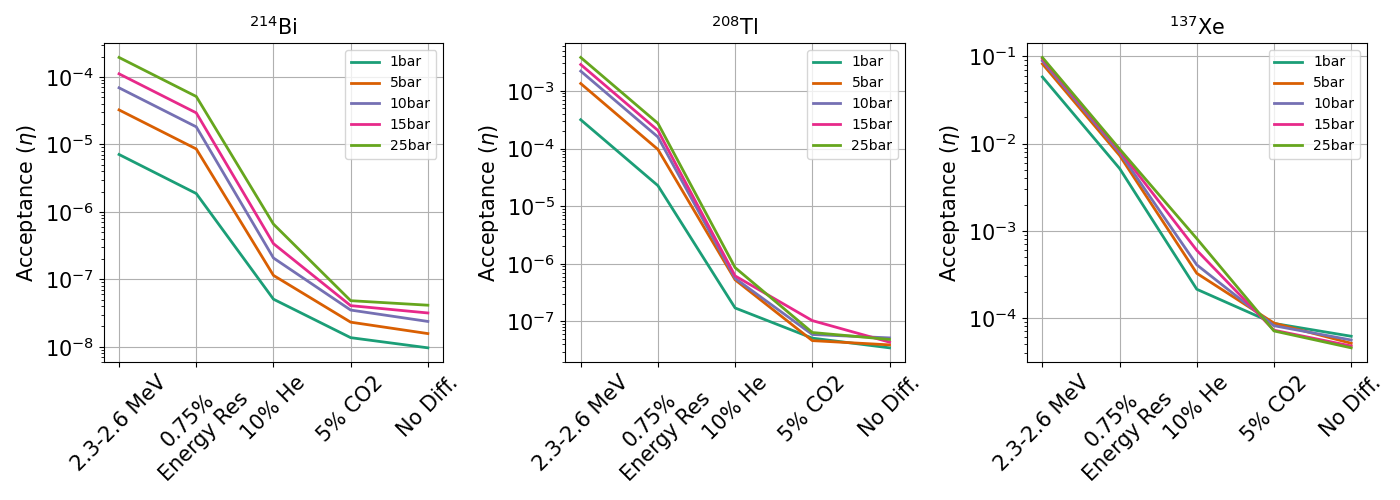

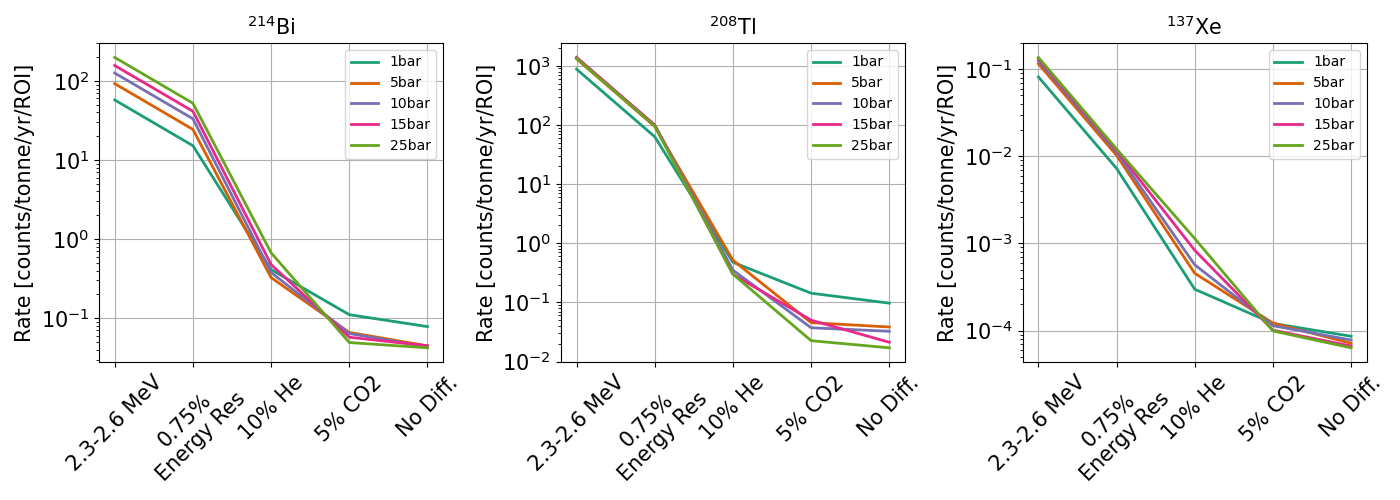

In [68]:
mode = "enr"
# mode = "nat"

if mode == "enr":
    Detsize = np.array([6.182, 3.615, 2.870, 2.507, 2.114])
    MCu_12cm = CalcMassCylinder(Detsize, 12e-2)
    Int_Win_Bi_12cm = np.array([708, 3241, 6891, 11105, 19419])/1e8
    Int_Win_Tl_12cm = np.array([3153, 13391, 22002, 28604, 37958]) /1e7
    Int_Win_single = np.array([5827, 8232, 8892, 9393, 9747])/100000
elif mode == "nat":
    Detsize = np.array([13.319, 7.789, 6.182, 5.301, 4.556])
    MCu_12cm = CalcMassCylinder(Detsize, 12e-2)
    Int_Win_Bi_12cm = np.array([708, 3241, 6891, 11105, 19419])/1e8
    Int_Win_Tl_12cm = np.array([9562, 29985, 42677, 49219, 57306])/10000000 
    Int_Win_single = np.array([7703, 9251, 9532, 9783, 10146])/100000

else:
    print("Unknown mode")



temp_df = df[ (df.cut == mode) & (df.Diffusion == "nodiff") ].sort_values(by="Pressure")
Bkg_rej_Bi_nodiff = temp_df.Bi_eff.values
Bkg_rej_Tl_nodiff = temp_df.Tl_eff.values
Bkg_rej_single_nodiff = temp_df.single_eff.values

temp_df = df[ (df.cut == mode) & (df.Diffusion == "5percent") ].sort_values(by="Pressure")
Bkg_rej_Bi_5p = temp_df.Bi_eff.values
Bkg_rej_Tl_5p = temp_df.Tl_eff.values
Bkg_rej_single_5p = temp_df.single_eff.values

temp_df = df[ (df.cut == mode) & (df.Diffusion == "0.05percent") ].sort_values(by="Pressure")
Bkg_rej_Bi_He = temp_df.Bi_eff.values
Bkg_rej_Tl_He = temp_df.Tl_eff.values
Bkg_rej_single_He = temp_df.single_eff.values



# 0.5% assymetric cut
Bi_ER2 = 0.12 
Tl_ER2 = 0.048

Bi_ER = 0.264
Tl_ER =  0.072
single_ER = 0.089
print(Bi_ER, Tl_ER)


# Acceptance
fig = plt.figure(figsize=(14,5));

cut_stage_label = ["2.3-2.6 MeV", "0.75%\nEnergy Res", "10% He", "5% CO2", "No Diff."]
pressures_label = ["1", "5", "10", "15", "25"]
pressures = [1, 5, 10, 15, 25]

plt.subplot(131);

for index, p in enumerate(pressures):
    initial_rate =(Int_Win_Bi_12cm[index]) 
    cut_stages = [initial_rate, initial_rate*Bi_ER, initial_rate*Bi_ER*Bkg_rej_Bi_He[index], initial_rate*Bi_ER*Bkg_rej_Bi_5p[index], initial_rate*Bi_ER*Bkg_rej_Bi_nodiff[index]]
    plt.plot(cut_stage_label, cut_stages, linewidth = 2, label = f"{pressures_label[index]}bar")

# Here lets plot the NEXT-1t analysis 
# initial_rate =(Int_Win_Bi_12cm[3] /1e8) 
# plt.plot(cut_stage_label, [initial_rate, initial_rate*Bi_ER2, initial_rate*Bi_ER2*2e-3], linewidth = 2, label = f"{pressures_label[3]}bar (NEXT1t)", c = "darkred", linestyle = "--") 

# plt.xlabel("Cut Stage", fontsize=15)
plt.ylabel(r"Acceptance ($\eta$)", fontsize=15)
plt.tick_params(axis='both', which='both', labelsize=15)
plt.legend()
plt.semilogy()
plt.grid()
plt.xticks(rotation=45) 
plt.title("$^{214}$Bi",fontsize=15)
# plt.axhline(y=1.2e-8, color='Teal', linestyle='--', linewidth=2)
plt.tight_layout()

plt.subplot(132);
for index, p in enumerate(pressures):
    initial_rate = (Int_Win_Tl_12cm[index]) 
    cut_stages = [initial_rate, initial_rate*Tl_ER, initial_rate*Tl_ER*Bkg_rej_Tl_He[index], initial_rate*Tl_ER*Bkg_rej_Tl_5p[index], initial_rate*Tl_ER*Bkg_rej_Tl_nodiff[index]]
    plt.plot(cut_stage_label, cut_stages, linewidth = 2, label = f"{pressures_label[index]}bar")

# Here lets plot the NEXT-1t analysis 
# initial_rate =(Int_Win_Tl_12cm[3] /1e8) 
# plt.plot(cut_stage_label, [initial_rate, initial_rate*Tl_ER2, initial_rate*Tl_ER2*500e-6], linewidth = 2, label = f"{pressures_label[3]}bar (NEXT1t)", c = "darkred", linestyle = "--") 

# plt.xlabel("Cut Stage", fontsize=15)
plt.ylabel(r"Acceptance ($\eta$)", fontsize=15)
plt.tick_params(axis='both', which='both', labelsize=15)
plt.legend()
plt.semilogy()
plt.grid()
# plt.ylim(5e-4, 2000)
plt.title("$^{208}$Tl",fontsize=15)
plt.xticks(rotation=45) 
# plt.axhline(y=4.5e-8, color='Orange', linestyle='--', linewidth=2)
plt.tight_layout()


plt.subplot(133);
for index, p in enumerate(pressures):
    initial_rate = (Int_Win_single[index]) 
    cut_stages = [initial_rate, initial_rate*single_ER, initial_rate*single_ER*Bkg_rej_single_He[index], initial_rate*single_ER*Bkg_rej_single_5p[index], initial_rate*single_ER*Bkg_rej_single_nodiff[index]]
    plt.plot(cut_stage_label, cut_stages, linewidth = 2, label = f"{pressures_label[index]}bar")

# Here lets plot the NEXT-1t analysis 
# initial_rate =(Int_Win_Tl_12cm[3] /1e8) 
# plt.plot(cut_stage_label, [initial_rate, initial_rate*Tl_ER2, initial_rate*Tl_ER2*500e-6], linewidth = 2, label = f"{pressures_label[3]}bar (NEXT1t)", c = "darkred", linestyle = "--") 

# plt.xlabel("Cut Stage", fontsize=15)
plt.ylabel(r"Acceptance ($\eta$)", fontsize=15)
plt.tick_params(axis='both', which='both', labelsize=15)
plt.legend()
plt.semilogy()
plt.grid()
# plt.ylim(5e-4, 2000)
plt.title("$^{137}$Xe",fontsize=15)
# plt.axhline(y=5.68e-5, color='Orange', linestyle='--', linewidth=2)
plt.xticks(rotation=45) 
plt.tight_layout()

plt.savefig(f"../../../Projects/Atmospheric TPC/PaperDraft/AcceptancePressure_{mode}.pdf")

# ---------------------------------------------------------------------------------------------------------------------------------
# Rates

fig = plt.figure(figsize=(14,5));

cut_stage_label = ["2.3-2.6 MeV", "0.75%\nEnergy Res", "10% He", "5% CO2", "No Diff."]
pressures_label = ["1", "5", "10", "15", "25"]
pressures = [1, 5, 10, 15, 25]

plt.subplot(131);

for index, p in enumerate(pressures):
    initial_rate = 1.28e-6 * (Int_Win_Bi_12cm[index]) * 3.15e7 *  MCu_12cm[index]
    cut_stages = [initial_rate, initial_rate*Bi_ER, initial_rate*Bi_ER*Bkg_rej_Bi_He[index], initial_rate*Bi_ER*Bkg_rej_Bi_5p[index], initial_rate*Bi_ER*Bkg_rej_Bi_nodiff[index]]
    plt.plot(cut_stage_label, cut_stages, linewidth = 2, label = f"{pressures_label[index]}bar")

# Here lets plot the NEXT-1t analysis 
# initial_rate = 1.28e-6 * (Int_Win_Bi_12cm[3] /1e8) * 3.15e7 *  MCu_12cm[3]
# plt.plot(cut_stage_label, [initial_rate, initial_rate*Bi_ER2, initial_rate*Bi_ER2*2e-3], linewidth = 2, label = f"{pressures_label[3]}bar (NEXT1t)", c = "darkred", linestyle = "--") 

# plt.xlabel("Cut Stage", fontsize=15)
plt.ylabel("Rate [counts/tonne/yr/ROI]", fontsize=15)
plt.tick_params(axis='both', which='both', labelsize=15)
plt.legend()
plt.semilogy()
plt.grid()
# plt.ylim(5e-4, 200)
# plt.axhline(y=3.5e-2, color='Teal', linestyle='--', linewidth=2)
plt.title("$^{214}$Bi",fontsize=15)
plt.xticks(rotation=45) 
plt.tight_layout()



plt.subplot(132);
for index, p in enumerate(pressures):
    initial_rate = 35.94e-2 * 1.22e-6 * (Int_Win_Tl_12cm[index]) * 3.15e7 *  MCu_12cm[index]
    cut_stages = [initial_rate, initial_rate*Tl_ER, initial_rate*Tl_ER*Bkg_rej_Tl_He[index], initial_rate*Tl_ER*Bkg_rej_Tl_5p[index], initial_rate*Tl_ER*Bkg_rej_Tl_nodiff[index]]
    plt.plot(cut_stage_label, cut_stages, linewidth = 2, label = f"{pressures_label[index]}bar")

# Here lets plot the NEXT-1t analysis 
initial_rate = 35.94e-2 * 1.22e-6 * (Int_Win_Tl_12cm[3] /1e7) * 3.15e7 *  MCu_12cm[3]
# plt.plot(cut_stage_label, [initial_rate, initial_rate*Tl_ER2, initial_rate*Tl_ER2*500e-6], linewidth = 2, label = f"{pressures_label[3]}bar (NEXT1t)", c = "darkred", linestyle = "--") 

# plt.xlabel("Cut Stage", fontsize=15)
plt.ylabel("Rate [counts/tonne/yr/ROI]", fontsize=15)
plt.tick_params(axis='both', which='both', labelsize=15)
plt.legend()
plt.semilogy()
plt.grid()
# plt.ylim(5e-4, 2000)
plt.title("$^{208}$Tl",fontsize=15)
plt.tight_layout()
# plt.axhline(y=3.5e-2, color='Orange', linestyle='--', linewidth=2)
plt.xticks(rotation=45) 
plt.tight_layout()


plt.subplot(133);
for index, p in enumerate(pressures):
    initial_rate = (Int_Win_single[index]) * 1.4
    cut_stages = [initial_rate, initial_rate*single_ER, initial_rate*single_ER*Bkg_rej_single_He[index], initial_rate*single_ER*Bkg_rej_single_5p[index], initial_rate*single_ER*Bkg_rej_single_nodiff[index]]
    plt.plot(cut_stage_label, cut_stages, linewidth = 2, label = f"{pressures_label[index]}bar")

# plt.xlabel("Cut Stage", fontsize=15)
plt.ylabel("Rate [counts/tonne/yr/ROI]", fontsize=15)
plt.tick_params(axis='both', which='both', labelsize=15)
plt.legend()
plt.semilogy()
plt.grid()
# plt.ylim(5e-4, 2000)
plt.title("$^{137}$Xe",fontsize=15)
# plt.axhline(y=3.5e-2, color='Orange', linestyle='--', linewidth=2)
plt.xticks(rotation=45) 
plt.tight_layout()


plt.savefig(f"../../../Projects/Atmospheric TPC/PaperDraft/PerformancePressure_{mode}.pdf")

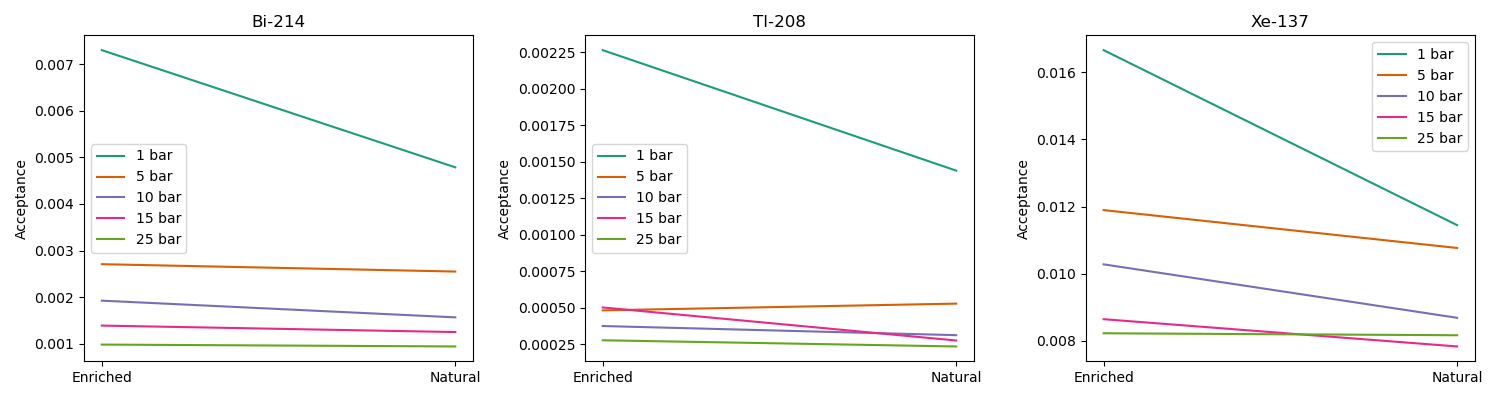

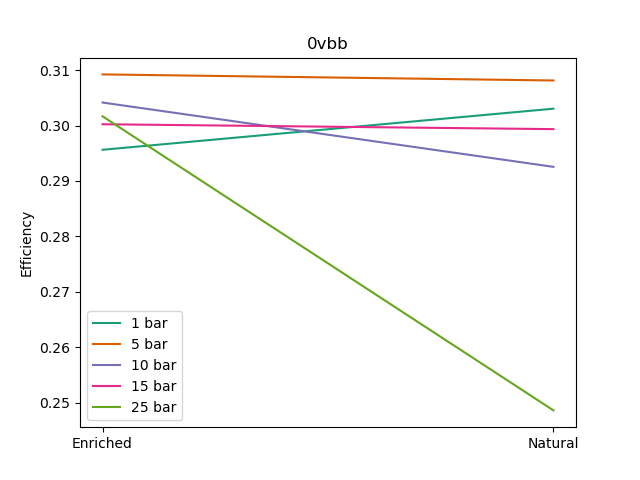

In [62]:
fig, ax = plt.subplots(1, 3, figsize=(15, 4))

pressures = [1, 5, 10, 15, 25]
modes = ["Enriched", "Natural"]
# diff = "0.05percent"
diff = "5percent"
# diff = "nodiff"
Backgrounds = ["Bi_eff", "Tl_eff", "single_eff"]
Titles = ["Bi-214", "Tl-208", "Xe-137"]

for p in pressures:

    for index, b in enumerate(Backgrounds):
        
        temp_df = df[(df.Pressure == p) & (df.Diffusion == diff)]
        temp_df = temp_df.reset_index(drop=True)
        # display(temp_df)
        ax[index].plot(modes, temp_df[b], label = f"{p} bar")
        ax[index].set_title(f"{Titles[index]}")
        ax[index].set_ylabel("Acceptance")

        ax[index].legend()

plt.tight_layout()

plt.figure()

for p in pressures:

    temp_df = df[(df.Pressure == p) & (df.Diffusion == diff)]
    temp_df = temp_df.reset_index(drop=True)
    # display(temp_df)
    plt.plot(modes, temp_df["nubb_eff"], label = f"{p} bar")
    plt.title(f"0vbb")
    plt.ylabel("Efficiency")

    plt.legend()



,Pressure,Diffusion,cut,nubb_gen,nubb_cut,nubb_eff,Bkg_gen,Bkg_cut,Bkg_eff,Bi_gen,Bi_cut,Bi_eff,Tl_gen,Tl_cut,Tl_eff,single_gen,single_cut,single_eff
5,1,5percent,enr,192287,106854.0,0.295633,599388,5269.0,0.008791,203897,1489.0,0.007303,195183,442.0,0.002265,200347,3338.0,0.016661
21,1,nodiff,enr,192298,89847.0,0.248565,599762,3734.0,0.006226,204022,1053.0,0.005161,195184,300.0,0.001537,200595,2381.0,0.011870
27,1,0.05percent,enr,192298,109253.0,0.302253,594825,15124.0,0.025426,199084,5405.0,0.027149,195184,1474.0,0.007552,200595,8245.0,0.041103


,Pressure,Diffusion,cut,nubb_gen,nubb_cut,nubb_eff,Bkg_gen,Bkg_cut,Bkg_eff,Bi_gen,Bi_cut,Bi_eff,Tl_gen,Tl_cut,Tl_eff,single_gen,single_cut,single_eff
5,1,5percent,enr,192287,106854.0,0.295633,599388,5269.0,0.008791,203897,1489.0,0.007303,195183,442.0,0.002265,200347,3338.0,0.016661
21,1,nodiff,enr,192298,89847.0,0.248565,599762,3734.0,0.006226,204022,1053.0,0.005161,195184,300.0,0.001537,200595,2381.0,0.011870
27,1,0.05percent,enr,192298,109253.0,0.302253,594825,15124.0,0.025426,199084,5405.0,0.027149,195184,1474.0,0.007552,200595,8245.0,0.041103


,Pressure,Diffusion,cut,nubb_gen,nubb_cut,nubb_eff,Bkg_gen,Bkg_cut,Bkg_eff,Bi_gen,Bi_cut,Bi_eff,Tl_gen,Tl_cut,Tl_eff,single_gen,single_cut,single_eff
5,1,5percent,enr,192287,106854.0,0.295633,599388,5269.0,0.008791,203897,1489.0,0.007303,195183,442.0,0.002265,200347,3338.0,0.016661
21,1,nodiff,enr,192298,89847.0,0.248565,599762,3734.0,0.006226,204022,1053.0,0.005161,195184,300.0,0.001537,200595,2381.0,0.011870
27,1,0.05percent,enr,192298,109253.0,0.302253,594825,15124.0,0.025426,199084,5405.0,0.027149,195184,1474.0,0.007552,200595,8245.0,0.041103


,Pressure,Diffusion,cut,nubb_gen,nubb_cut,nubb_eff,Bkg_gen,Bkg_cut,Bkg_eff,Bi_gen,Bi_cut,Bi_eff,Tl_gen,Tl_cut,Tl_eff,single_gen,single_cut,single_eff
2,5,5percent,enr,195171,81558.0,0.309231,731701,3137.0,0.004287,310281,840.0,0.002707,238263,115.0,0.000483,183465,2182.0,0.011893
23,5,nodiff,enr,195171,78260.0,0.296726,731706,1946.0,0.002660,310356,569.0,0.001833,238261,97.0,0.000407,183397,1280.0,0.006979
34,5,0.05percent,enr,195130,79776.0,0.302538,730594,13576.0,0.018582,309515,4135.0,0.013360,237926,1303.0,0.005476,183459,8138.0,0.044359


,Pressure,Diffusion,cut,nubb_gen,nubb_cut,nubb_eff,Bkg_gen,Bkg_cut,Bkg_eff,Bi_gen,Bi_cut,Bi_eff,Tl_gen,Tl_cut,Tl_eff,single_gen,single_cut,single_eff
2,5,5percent,enr,195171,81558.0,0.309231,731701,3137.0,0.004287,310281,840.0,0.002707,238263,115.0,0.000483,183465,2182.0,0.011893
23,5,nodiff,enr,195171,78260.0,0.296726,731706,1946.0,0.002660,310356,569.0,0.001833,238261,97.0,0.000407,183397,1280.0,0.006979
34,5,0.05percent,enr,195130,79776.0,0.302538,730594,13576.0,0.018582,309515,4135.0,0.013360,237926,1303.0,0.005476,183459,8138.0,0.044359


,Pressure,Diffusion,cut,nubb_gen,nubb_cut,nubb_eff,Bkg_gen,Bkg_cut,Bkg_eff,Bi_gen,Bi_cut,Bi_eff,Tl_gen,Tl_cut,Tl_eff,single_gen,single_cut,single_eff
2,5,5percent,enr,195171,81558.0,0.309231,731701,3137.0,0.004287,310281,840.0,0.002707,238263,115.0,0.000483,183465,2182.0,0.011893
23,5,nodiff,enr,195171,78260.0,0.296726,731706,1946.0,0.002660,310356,569.0,0.001833,238261,97.0,0.000407,183397,1280.0,0.006979
34,5,0.05percent,enr,195130,79776.0,0.302538,730594,13576.0,0.018582,309515,4135.0,0.013360,237926,1303.0,0.005476,183459,8138.0,0.044359


,Pressure,Diffusion,cut,nubb_gen,nubb_cut,nubb_eff,Bkg_gen,Bkg_cut,Bkg_eff,Bi_gen,Bi_cut,Bi_eff,Tl_gen,Tl_cut,Tl_eff,single_gen,single_cut,single_eff
4,10,5percent,enr,194831,73522.0,0.304155,754896,2699.0,0.003575,359595,692.0,0.001924,207799,78.0,0.000375,187711,1929.0,0.010276
10,10,nodiff,enr,194831,74238.0,0.307117,754376,1858.0,0.002463,359333,469.0,0.001305,207655,68.0,0.000327,187597,1321.0,0.007042
24,10,0.05percent,enr,194462,73202.0,0.303405,752667,14442.0,0.019188,358238,4076.0,0.011378,207018,731.0,0.003531,187620,9635.0,0.051354


,Pressure,Diffusion,cut,nubb_gen,nubb_cut,nubb_eff,Bkg_gen,Bkg_cut,Bkg_eff,Bi_gen,Bi_cut,Bi_eff,Tl_gen,Tl_cut,Tl_eff,single_gen,single_cut,single_eff
4,10,5percent,enr,194831,73522.0,0.304155,754896,2699.0,0.003575,359595,692.0,0.001924,207799,78.0,0.000375,187711,1929.0,0.010276
10,10,nodiff,enr,194831,74238.0,0.307117,754376,1858.0,0.002463,359333,469.0,0.001305,207655,68.0,0.000327,187597,1321.0,0.007042
24,10,0.05percent,enr,194462,73202.0,0.303405,752667,14442.0,0.019188,358238,4076.0,0.011378,207018,731.0,0.003531,187620,9635.0,0.051354


,Pressure,Diffusion,cut,nubb_gen,nubb_cut,nubb_eff,Bkg_gen,Bkg_cut,Bkg_eff,Bi_gen,Bi_cut,Bi_eff,Tl_gen,Tl_cut,Tl_eff,single_gen,single_cut,single_eff
4,10,5percent,enr,194831,73522.0,0.304155,754896,2699.0,0.003575,359595,692.0,0.001924,207799,78.0,0.000375,187711,1929.0,0.010276
10,10,nodiff,enr,194831,74238.0,0.307117,754376,1858.0,0.002463,359333,469.0,0.001305,207655,68.0,0.000327,187597,1321.0,0.007042
24,10,0.05percent,enr,194462,73202.0,0.303405,752667,14442.0,0.019188,358238,4076.0,0.011378,207018,731.0,0.003531,187620,9635.0,0.051354


,Pressure,Diffusion,cut,nubb_gen,nubb_cut,nubb_eff,Bkg_gen,Bkg_cut,Bkg_eff,Bi_gen,Bi_cut,Bi_eff,Tl_gen,Tl_cut,Tl_eff,single_gen,single_cut,single_eff
7,15,5percent,enr,195042,70131.0,0.300240,790755,2278.0,0.002881,381578,530.0,0.001389,220849,111.0,0.000503,189422,1637.0,0.008642
13,15,nodiff,enr,195246,70127.0,0.299909,791269,1539.0,0.001945,381848,413.0,0.001082,220980,47.0,0.000213,189534,1079.0,0.005693
36,15,0.05percent,enr,194426,70886.0,0.304434,786856,18528.0,0.023547,379236,4372.0,0.011528,219388,657.0,0.002995,189311,13499.0,0.071306


,Pressure,Diffusion,cut,nubb_gen,nubb_cut,nubb_eff,Bkg_gen,Bkg_cut,Bkg_eff,Bi_gen,Bi_cut,Bi_eff,Tl_gen,Tl_cut,Tl_eff,single_gen,single_cut,single_eff
7,15,5percent,enr,195042,70131.0,0.300240,790755,2278.0,0.002881,381578,530.0,0.001389,220849,111.0,0.000503,189422,1637.0,0.008642
13,15,nodiff,enr,195246,70127.0,0.299909,791269,1539.0,0.001945,381848,413.0,0.001082,220980,47.0,0.000213,189534,1079.0,0.005693
36,15,0.05percent,enr,194426,70886.0,0.304434,786856,18528.0,0.023547,379236,4372.0,0.011528,219388,657.0,0.002995,189311,13499.0,0.071306


,Pressure,Diffusion,cut,nubb_gen,nubb_cut,nubb_eff,Bkg_gen,Bkg_cut,Bkg_eff,Bi_gen,Bi_cut,Bi_eff,Tl_gen,Tl_cut,Tl_eff,single_gen,single_cut,single_eff
7,15,5percent,enr,195042,70131.0,0.300240,790755,2278.0,0.002881,381578,530.0,0.001389,220849,111.0,0.000503,189422,1637.0,0.008642
13,15,nodiff,enr,195246,70127.0,0.299909,791269,1539.0,0.001945,381848,413.0,0.001082,220980,47.0,0.000213,189534,1079.0,0.005693
36,15,0.05percent,enr,194426,70886.0,0.304434,786856,18528.0,0.023547,379236,4372.0,0.011528,219388,657.0,0.002995,189311,13499.0,0.071306


,Pressure,Diffusion,cut,nubb_gen,nubb_cut,nubb_eff,Bkg_gen,Bkg_cut,Bkg_eff,Bi_gen,Bi_cut,Bi_eff,Tl_gen,Tl_cut,Tl_eff,single_gen,single_cut,single_eff
14,25,nodiff,enr,193211,67610.0,0.306537,801114,1350.0,0.001685,400646,323.0,0.000806,213056,38.0,0.000178,189234,989.0,0.005226
19,25,0.05percent,enr,188725,65296.0,0.303083,781714,23233.0,0.029721,389318,4997.0,0.012835,206300,648.0,0.003141,187823,17588.0,0.093641
30,25,5percent,enr,191502,54349.6,0.248615,794803,1956.0,0.002461,396482,373.0,0.000941,212357,50.0,0.000235,187784,1533.0,0.008164


,Pressure,Diffusion,cut,nubb_gen,nubb_cut,nubb_eff,Bkg_gen,Bkg_cut,Bkg_eff,Bi_gen,Bi_cut,Bi_eff,Tl_gen,Tl_cut,Tl_eff,single_gen,single_cut,single_eff
14,25,nodiff,enr,193211,67610.0,0.306537,801114,1350.0,0.001685,400646,323.0,0.000806,213056,38.0,0.000178,189234,989.0,0.005226
19,25,0.05percent,enr,188725,65296.0,0.303083,781714,23233.0,0.029721,389318,4997.0,0.012835,206300,648.0,0.003141,187823,17588.0,0.093641
30,25,5percent,enr,191502,54349.6,0.248615,794803,1956.0,0.002461,396482,373.0,0.000941,212357,50.0,0.000235,187784,1533.0,0.008164


,Pressure,Diffusion,cut,nubb_gen,nubb_cut,nubb_eff,Bkg_gen,Bkg_cut,Bkg_eff,Bi_gen,Bi_cut,Bi_eff,Tl_gen,Tl_cut,Tl_eff,single_gen,single_cut,single_eff
14,25,nodiff,enr,193211,67610.0,0.306537,801114,1350.0,0.001685,400646,323.0,0.000806,213056,38.0,0.000178,189234,989.0,0.005226
19,25,0.05percent,enr,188725,65296.0,0.303083,781714,23233.0,0.029721,389318,4997.0,0.012835,206300,648.0,0.003141,187823,17588.0,0.093641
30,25,5percent,enr,191502,54349.6,0.248615,794803,1956.0,0.002461,396482,373.0,0.000941,212357,50.0,0.000235,187784,1533.0,0.008164


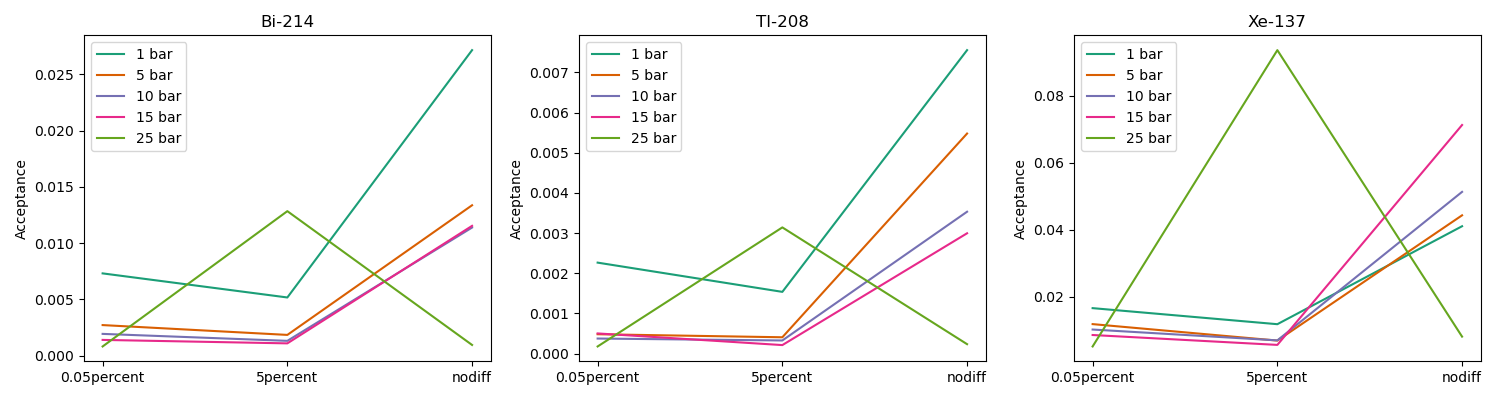

In [63]:
fig, ax = plt.subplots(1, 3, figsize=(15, 4))

pressures = [1, 5, 10, 15, 25]
modes = ["Enriched", "Natural"]
# diff = "0.05percent"
diff = "5percent"
# diff = "nodiff"

diffusions = ["0.05percent", "5percent", "nodiff"]
mode = "enr"

Backgrounds = ["Bi_eff", "Tl_eff", "single_eff"]
Titles = ["Bi-214", "Tl-208", "Xe-137"]

for p in pressures:

    for index, b in enumerate(Backgrounds):
        
        temp_df = df[(df.Pressure == p) & (df.cut == mode)]
        temp_df = temp_df[ (temp_df.Diffusion == "nodiff") | (temp_df.Diffusion == "5percent") | (temp_df.Diffusion == "0.05percent")]
        df.sort_values(by="Diffusion", ascending=False)
        display(temp_df)
        temp_df = temp_df.reset_index(drop=True)
        # display(temp_df)
        ax[index].plot(diffusions, temp_df[b], label = f"{p} bar")
        ax[index].set_title(f"{Titles[index]}")
        ax[index].set_ylabel("Acceptance")

        ax[index].legend()

plt.tight_layout()

# plt.figure()

# for p in pressures:

#     temp_df = df[(df.Pressure == p) & (df.Diffusion == diff)]
#     temp_df = temp_df.reset_index(drop=True)
#     # display(temp_df)
#     plt.plot(modes, temp_df["nubb_eff"], label = f"{p} bar")
#     plt.title(f"0vbb")
#     plt.ylabel("Efficiency")

#     plt.legend()


,Pressure,Diffusion,cut,nubb_gen,nubb_cut,nubb_eff,Bkg_gen,Bkg_cut,Bkg_eff,Bi_gen,Bi_cut,Bi_eff,Tl_gen,Tl_cut,Tl_eff,single_gen,single_cut,single_eff
0,1,0.05percent,enr,192298,109253.0,0.302253,594825,15124.0,0.025426,199084,5405.0,0.027149,195184,1474.0,0.007552,200595,8245.0,0.041103
1,5,0.05percent,enr,195130,79776.0,0.302538,730594,13576.0,0.018582,309515,4135.0,0.013360,237926,1303.0,0.005476,183459,8138.0,0.044359
2,10,0.05percent,enr,194462,73202.0,0.303405,752667,14442.0,0.019188,358238,4076.0,0.011378,207018,731.0,0.003531,187620,9635.0,0.051354
3,15,0.05percent,enr,194426,70886.0,0.304434,786856,18528.0,0.023547,379236,4372.0,0.011528,219388,657.0,0.002995,189311,13499.0,0.071306
4,25,0.05percent,enr,188725,65296.0,0.303083,781714,23233.0,0.029721,389318,4997.0,0.012835,206300,648.0,0.003141,187823,17588.0,0.093641


,Pressure,Diffusion,cut,nubb_gen,nubb_cut,nubb_eff,Bkg_gen,Bkg_cut,Bkg_eff,Bi_gen,Bi_cut,Bi_eff,Tl_gen,Tl_cut,Tl_eff,single_gen,single_cut,single_eff
0,1,5percent,enr,192287,106854.0,0.295633,599388,5269.0,0.008791,203897,1489.0,0.007303,195183,442.0,0.002265,200347,3338.0,0.016661
1,5,5percent,enr,195171,81558.0,0.309231,731701,3137.0,0.004287,310281,840.0,0.002707,238263,115.0,0.000483,183465,2182.0,0.011893
2,10,5percent,enr,194831,73522.0,0.304155,754896,2699.0,0.003575,359595,692.0,0.001924,207799,78.0,0.000375,187711,1929.0,0.010276
3,15,5percent,enr,195042,70131.0,0.300240,790755,2278.0,0.002881,381578,530.0,0.001389,220849,111.0,0.000503,189422,1637.0,0.008642
4,25,5percent,enr,191502,54349.6,0.248615,794803,1956.0,0.002461,396482,373.0,0.000941,212357,50.0,0.000235,187784,1533.0,0.008164


,Pressure,Diffusion,cut,nubb_gen,nubb_cut,nubb_eff,Bkg_gen,Bkg_cut,Bkg_eff,Bi_gen,Bi_cut,Bi_eff,Tl_gen,Tl_cut,Tl_eff,single_gen,single_cut,single_eff
0,1,nodiff,enr,192298,89847.0,0.248565,599762,3734.0,0.006226,204022,1053.0,0.005161,195184,300.0,0.001537,200595,2381.0,0.011870
1,5,nodiff,enr,195171,78260.0,0.296726,731706,1946.0,0.002660,310356,569.0,0.001833,238261,97.0,0.000407,183397,1280.0,0.006979
2,10,nodiff,enr,194831,74238.0,0.307117,754376,1858.0,0.002463,359333,469.0,0.001305,207655,68.0,0.000327,187597,1321.0,0.007042
3,15,nodiff,enr,195246,70127.0,0.299909,791269,1539.0,0.001945,381848,413.0,0.001082,220980,47.0,0.000213,189534,1079.0,0.005693
4,25,nodiff,enr,193211,67610.0,0.306537,801114,1350.0,0.001685,400646,323.0,0.000806,213056,38.0,0.000178,189234,989.0,0.005226


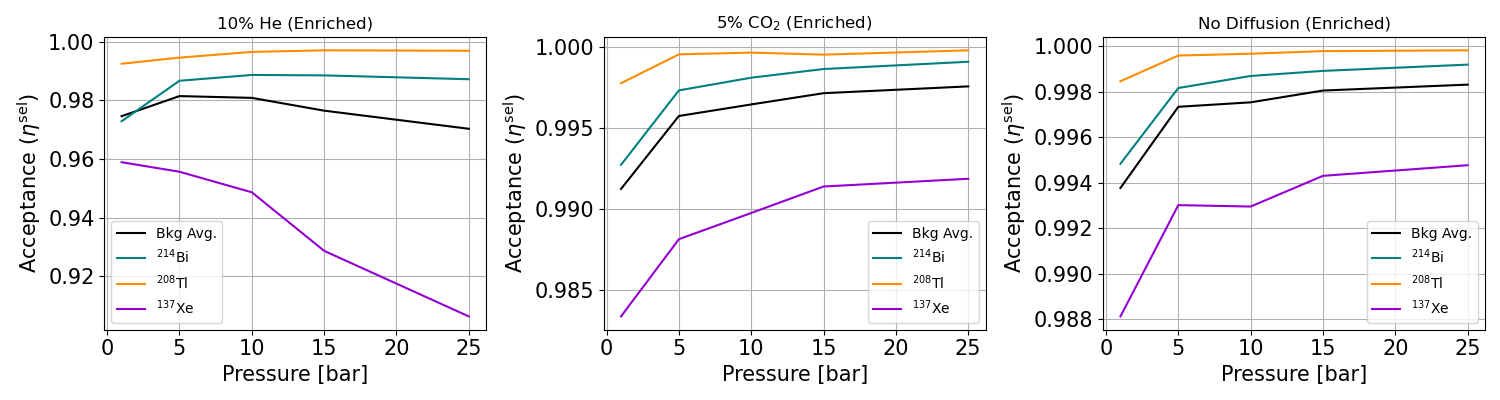

In [66]:
# make a plot of the selection acceptance factor. 



fig, ax = plt.subplots(1, 3, figsize=(15, 4))

pressures = [1, 5, 10, 15, 25]


diffusions = ["0.05percent", "5percent", "nodiff"]
mode = "enr"
# mode = "nat"

Backgrounds = ["Bi_eff", "Tl_eff", "single_eff"]
Titles = ["10% He", "5% CO$_2$", "No Diffusion"]


for index, d in enumerate(diffusions):
    
    temp_df = df[(df.cut == mode) & (df.Diffusion == d)]
    temp_df= temp_df.sort_values(by="Pressure", ascending=True)
    temp_df = temp_df.reset_index(drop=True)
    display(temp_df)
    
    ax[index].plot(temp_df.Pressure, 1-temp_df["Bkg_eff"], label = f"Bkg Avg.", c = "k")
    ax[index].plot(temp_df.Pressure, 1-temp_df["Bi_eff"], label = r"$^{214}$Bi", c = "Teal")
    ax[index].plot(temp_df.Pressure, 1-temp_df["Tl_eff"], label = r"$^{208}$Tl", c = "DarkOrange")
    ax[index].plot(temp_df.Pressure, 1-temp_df["single_eff"], label = r"$^{137}$Xe", c = "darkviolet")
    
    ax[index].set_title(f"{Titles[index]} (Enriched)")

    ax[index].legend()
    ax[index].grid()
    ax[index].set_xlabel("Pressure [bar]", fontsize = 15)
    ax[index].set_ylabel(r"Acceptance ($\eta^{\mathrm{sel}}$)", fontsize = 15)
    ax[index].tick_params(axis='both', which='both', labelsize=15)
    # ax[index].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    # ax[index].ticklabel_format(style='sci', axis='y', scilimits=(0,0))


plt.tight_layout()


plt.savefig(f"../../../Projects/Atmospheric TPC/PaperDraft/SelectionPerformancePressure_{mode}.pdf")